<h1 style="text-align: center;" >
Experiment 5 <br> 
The Laws of Radiation <br> 
Stefan-Boltzmann Law(Radiant flux)
</h1> 


In [53]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.stats import linregress
'''plotting necessities'''
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use("bmh")
'''Some constants'''
h = 6.6268e-34 #planck's
C = 3e8 #speed of light
k = 1.38e-23 #boltzmann

In [30]:
sf = lambda T: 8*(k*T)**3/(h**2*C**3)

p_gsv0 = lambda x: np.pi*x**3/(np.exp(x)-1)

def planck_u(nu,t):
    es = k*t
    ls = h*C/es
    x = h*nu/(k*t)
    f = p_gsv0(x)
    u = sf(t)*f
    return(x,f,u)
    
planck_u = np.vectorize(planck_u)


In [76]:
x = np.linspace(1e-10,5,int(1e4))
y = p_gsv0(x)

def energy_diff(xm,f,a,b):
    int1,int2 = quad(f,a,xm)[0],quad(f,xm,b)[0]
    return(np.abs(int1-int2))

xp = (x[np.max(y)==y])

/tmp/ipykernel_4797/3183691784.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  p_gsv0 = lambda x: np.pi*x**3/(np.exp(x)-1)
/tmp/ipykernel_4797/2716032602.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int1,int2 = quad(f,a,xm)[0],quad(f,xm,b)[0]
/tmp/ipykernel_4797/2716032602.py:5: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  int1,int2 = quad(f,a,xm)[0],quad(f,xm,b)[0]


array([6.45e-07])

In [90]:
energy_diff_p = lambda xm: energy_diff(xm,p_gsv0,1e-10,10)
xm = (fsolve(energy_diff_p,xp))
print(xm)
print("Corresponding wavelenght of sun:", h*C/(k*t*xm))
t= 5800
b = (h*C)/(k*xm)
b

[3.47982613]
Corresponding wavelenght of sun: [7.10886989e-07]


array([0.00412314])

In [91]:
u = quad(p_gsv0,1e-2,1e4)[0]/np.pi
print(u - np.pi**4/15)
def F(t):
    ls = h*C/(k*t)
    return(C/4*8*np.pi*u*k*t/(ls**3))

F = np.vectorize(F)

-3.3208499861103746e-07


/tmp/ipykernel_4797/3183691784.py:3: RuntimeWarning: overflow encountered in exp
  p_gsv0 = lambda x: np.pi*x**3/(np.exp(x)-1)


[ 100.  600. 1100. 1600. 2100. 2600. 3100. 3600. 4100. 4600. 5100. 5600.
 6100. 6600. 7100. 7600. 8100. 8600. 9100. 9600.]
LinregressResult(slope=3.999999999999999, intercept=-16.67686372815412, rvalue=1.0, pvalue=9.49609375000032e-179, stderr=0.0, intercept_stderr=0.0)
Steffan's const:  5.719131829416694e-08


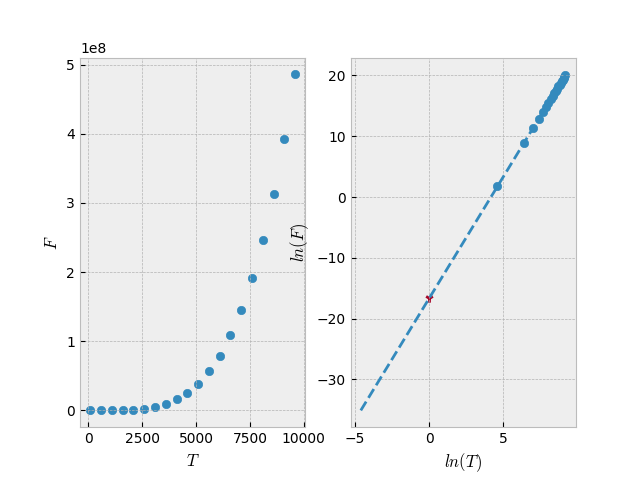

In [92]:
fig,(ax1,ax2) = plt.subplots(1,2)
t_space = np.arange(100,int(1e4),500,dtype=float)
print(t_space)
Fval = F(t_space)
ax1.scatter(t_space,F(t_space))
ax2.scatter(np.log(t_space),np.log(F(t_space)))
ax1.set_xlabel("$T$");ax1.set_ylabel("$F$");
ax2.set_xlabel("$ln(T)$");ax2.set_ylabel("$ln(F)$");
t_spacem = np.linspace(0.01,1e4)
fit = linregress(np.log(t_space),np.log(Fval))
ax2.scatter([0],fit.intercept,marker = "1")
ax2.plot(np.log(t_spacem),fit.intercept + fit.slope*np.log(t_spacem),ls="--")
print(fit)
steffan = np.exp(fit.intercept)
print("Steffan's const: ",steffan)
plt.show()